#####  1 Introduction:
a. Explain the dataset with your own words. Focus on the attributes description. 

The sample dataset used in this assignment is downloaded from https://www.kaggle.com/himanshupoddar/zomato-bangalore-restaurants. Zomato is one of the famous online food review and delivery application in India, while the bangalore is a multi-culture city with restaurants serving cuisines from all over the world.There are total of 51,717 observations and 17 attributes in this dataset.
The attribute description of this dataset is as follows: 
• URL : Unique URL of each restaurant as registered in Zomato website 
• Address: Address of each restaurant in Bangalore,as registered in Zomato website 
• Name: Name of each restaurant 
• Online_order: Describes whether online order is available in the restaurant or not 
• Book_table: Describes whether option to book a table is available or not 
• Rate: Average Rating of the restaurant out of the total 5 
• Votes: Count of the total ratings provided by customers to each restaurant 
• Phone: Contact details of each restaurant 
• Location: Demographic details of each restaurant 
• Restaurant_type: Type of restaurant such as casual dining,bakery,cafe 
• Dish liked: Specific dish liked by people in each restaurant 
• Cuisines: Different types of food culture available 
• Approx_cost(for two people): Approximate food estimation for two people 
• Reviews_list: Rating and review by the customer for each restaurant
• Menu_item: Menu list for each restaurant 
• Listed_in(type): type of meal 
• Listed_in(city):neighbourhood in which the restaurant is located
With the help of this dataset, we can analyse various scenarios such as the top best locality in Bangalore to find good food or the type of food that is popular in specific for each locality.It also helps us to find the factors affecting the aggregate rating of each restaurant or to predict the approximate cost of a meal based on location, rating, cuisine attributes.

#ref: https://www.kaggle.com/venkateshprabhug/analyzing-the-restaurants-in-bengaluru

In [570]:
from sklearn import datasets 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import  precision_score, recall_score,f1_score,accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy as sp

#### 2. Data pre-processing and understanding.

In [571]:
#2a. Load Data.
#Ref: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

df = pd.read_csv("/Users/naveenkusakula/OneDrive - Dalhousie University/DataProcess/Assignment1/zomato.csv")
print ('Data Loaded sucessfully')
print ('Data Set attribute:')
print (df.columns)
print ('Data Set Size:')
print (df.shape)

Data Loaded sucessfully
Data Set attribute:
Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')
Data Set Size:
(51717, 17)


In [572]:
df

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
5,https://www.zomato.com/bangalore/timepass-dinn...,"37, 5-1, 4th Floor, Bosco Court, Gandhi Bazaar...",Timepass Dinner,Yes,No,3.8/5,286,+91 9980040002\r\n+91 9980063005,Basavanagudi,Casual Dining,"Onion Rings, Pasta, Kadhai Paneer, Salads, Sal...",North Indian,600,"[('Rated 3.0', 'RATED\n Food 3/5\nAmbience 3/...",[],Buffet,Banashankari
6,https://www.zomato.com/bangalore/rosewood-inte...,"19/1, New Timberyard Layout, Beside Satellite ...",Rosewood International Hotel - Bar & Restaurant,No,No,3.6/5,8,+91 9731716688\r\n080 26740366,Mysore Road,Casual Dining,NaN,"North Indian, South Indian, Andhra, Chinese",800,"[('Rated 5.0', 'RATED\n Awesome food ??Great ...",[],Buffet,Banashankari
7,https://www.zomato.com/bangalore/onesta-banash...,"2469, 3rd Floor, 24th Cross, Opposite BDA Comp...",Onesta,Yes,Yes,4.6/5,2556,080 48653961\r\n080 48655715,Banashankari,"Casual Dining, Cafe","Farmhouse Pizza, Chocolate Banana, Virgin Moji...","Pizza, Cafe, Italian",600,"[('Rated 5.0', 'RATED\n I personally really l...",[],Cafes,Banashankari
8,https://www.zomato.com/bangalore/penthouse-caf...,"1, 30th Main Road, 3rd Stage, Banashankari, Ba...",Penthouse Cafe,Yes,No,4.0/5,324,+91 8884135549\r\n+91 9449449316,Banashankari,Cafe,"Pizza, Mocktails, Coffee, Nachos, Salad, Pasta...","Cafe, Italian, Continental",700,"[('Rated 3.0', ""RATED\n I had been to this pl...",[],Cafes,Banashankari
9,https://www.zomato.com/bangalore/smacznego-ban...,"2470, 21 Main Road, 25th Cross, Banashankari, ...",Smacznego,Yes,No,4.2/5,504,+91 9945230807\r\n+91 9743804471,Banashankari,Cafe,"Waffles, Pasta, Coleslaw Sandwich, Choco Waffl...","Cafe, Mexican, Italian, Momos, Beverages",550,"[('Rated 4.0', ""RATED\n Easy to locate\nVFM 3...",[],Cafes,Banashankari


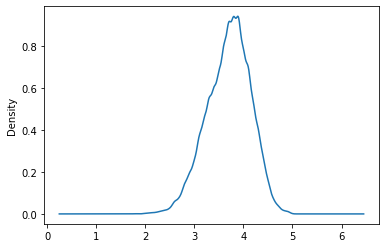

In [573]:
#2b. Explore the data. Plot the distribution of the attributes (frequency).
 

#https://www.kaggle.com/agnihotri/zomato-data-exploration-and-visualization/notebook#Loading-and-Understanding-Data
#https://www.geeksforgeeks.org/python-pandas-split-strings-into-two-list-columns-using-str-split/

# Frequency Attribute: The cloumns contains '/', it is cleaned and convetered into float
# and distribution is plotted as below it depicts rating density ranges from 2.5 to 5 and
# most of the ratings(frequency) are around 3.5-4.0
rateColumnSplitedData = df['rate'].str.split('/',n=2,expand=True)
df['rate'] = rateColumnSplitedData[0]
df['rate'] = df['rate'].apply(lambda x: None if x in ('NEW',None,'-') else float(x))
df.rate.plot(kind='kde')

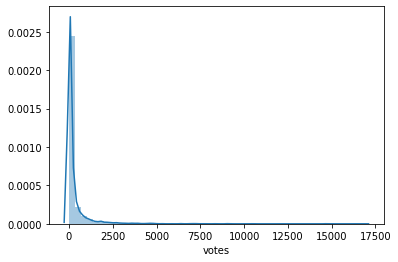

In [574]:
#Ref: https://www.kaggle.com/agnihotri/zomato-data-exploration-and-visualization/notebook#Loading-and-Understanding-Data
#Vote Attribute: Below distribution is for votes attribute and it depicts number of votes ranging from 0 to 7000 
#and most of the votes (frequency) are around 400 - 500 

sns.distplot(df['votes'])

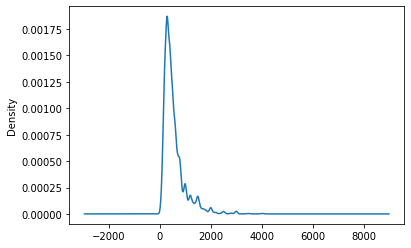

In [575]:
#Cleaned Approx_cost(for two people) by removing , and changing them into float 
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].str.replace(',','').apply(lambda x:float(x))

# Below distribution is for approximate cost for two people and density graph shows approximate cost from o to 4000
# it shows that aproximate cost frequency is high around 500 - 1000 as shown below
df['approx_cost(for two people)'].plot(kind='kde')

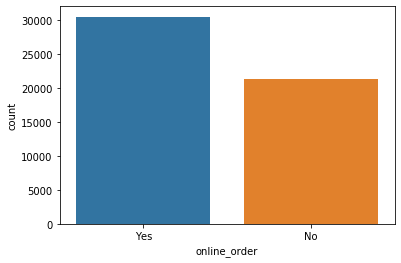

In [576]:
#Below graph shows that online orders are morte than offline orders for the given dataset

sns.countplot(x=df['online_order'])

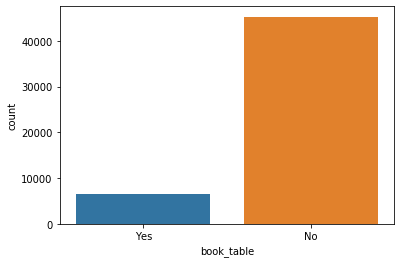

In [577]:
#Below graph shows table bookings in the restaurants where most of them are not booking the tables before they dine
sns.countplot(x=df['book_table'])

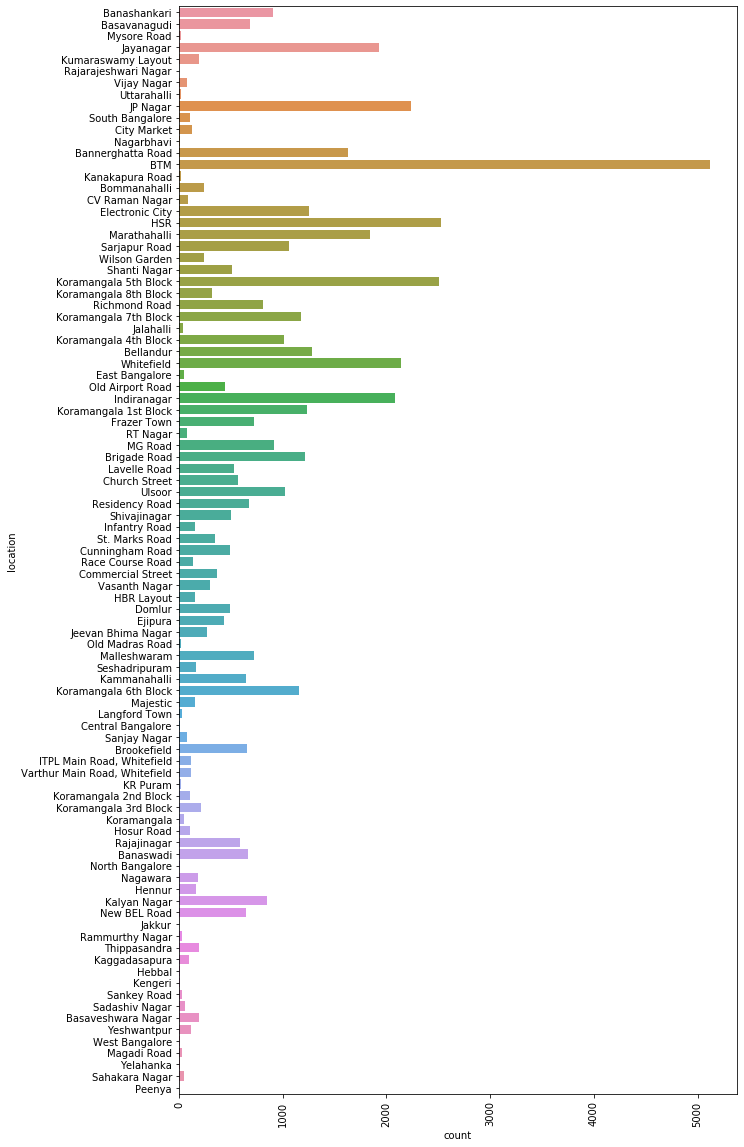

In [578]:
#Below graph shows number of restaurants across different locations and BTM has highest number of restaurants
fig = plt.figure(figsize=(10,20))
sns.countplot(y=df['location'])
p = plt.xticks(rotation=90)

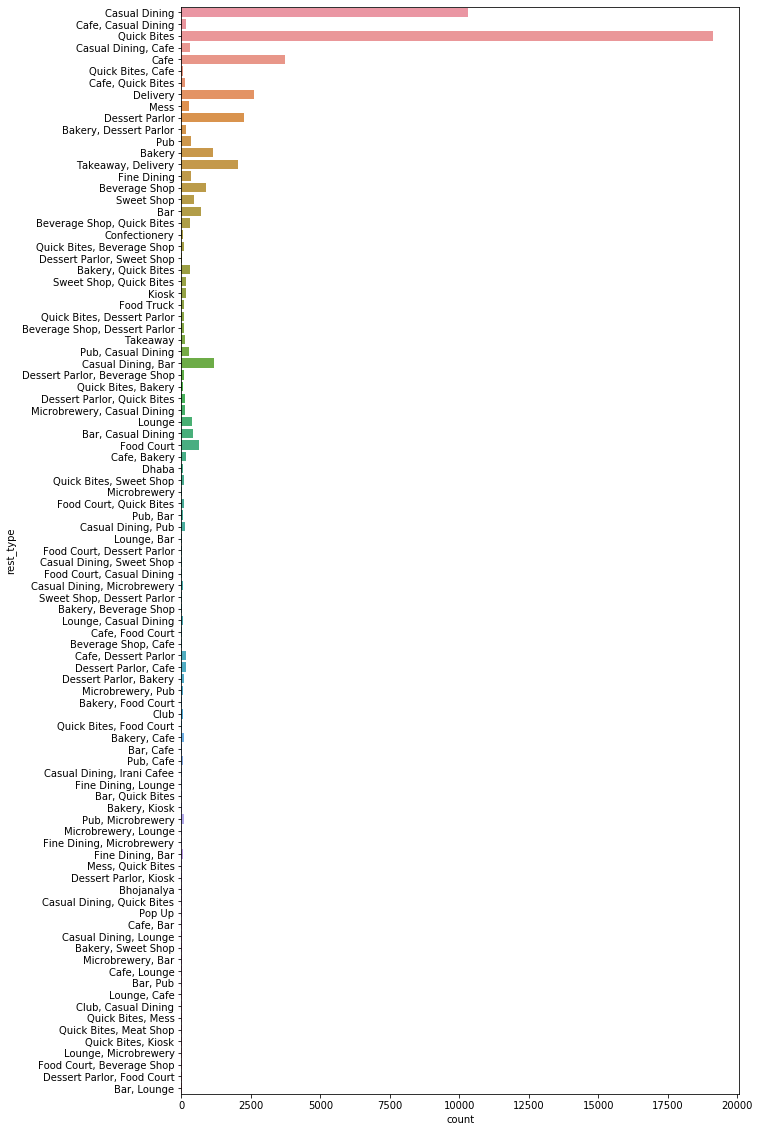

In [579]:
#Below graph shows that type of restaurants, which shows most of the restaurants are type Quick bites
fig = plt.figure(figsize=(10,20))
sns.countplot(y=df['rest_type'])

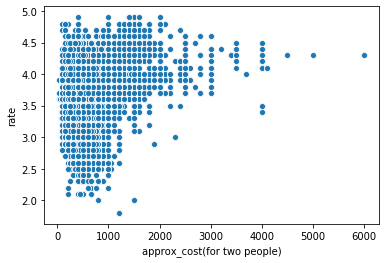

In [580]:
# Below plot is ratings vs Approximate cost of meal for two persons, which depicts that more ratings are given for 
# approximate cost which lies between 0 to 1000
sns.scatterplot(x=df['approx_cost(for two people)'],y=df['rate'])

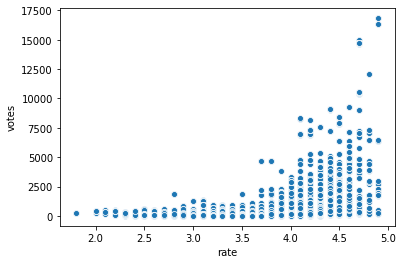

In [581]:
#below graph is between number of votes vs ratings, it depicts that higher ratings are given for good places
sns.scatterplot(x=df['rate'],y=df['votes'])

#### Useless features at this point:
Features like  
URL -  as it doesnot have any significance 
reviews_list - as it contians each rating of the customer and comments, these are not significant as the average rating for each customer is already present in rating coloumn 
Address - as we have location coulmn which can be used to group the restaurant, but if subset of each location is taken then we address have some significance

#### 2c. Are there restaurant duplicates in the data? Detect and if there is, clean it.
There are duplicates in the dataset as each restaurant are listed multiple times in listed_in(city) attribute, so we removed duplicates with checking duplicates in considering the columns 'address','name','online_order','book_table','rate','votes','phone','location','cuisines','approx_cost(for two people)','reviews_list' which resulted in 30027 instances

In [582]:
#duplicated number of rows
duplicateRowsDF = df[df.duplicated(['address','name','online_order','book_table','rate','votes','phone','location','cuisines','approx_cost(for two people)','reviews_list'])]
duplicateRowsDF.shape

(21690, 17)

In [583]:
#Getting the subset without duplicates
cd = df.drop_duplicates(subset=(['address','name','online_order','book_table','rate','votes','phone','location','cuisines','approx_cost(for two people)','reviews_list']),keep='first')
cd.shape

(30027, 17)

In [584]:
#Renaming the. columns for easy understanding and use
cd.rename(columns={'approx_cost(for two people)': 'approx_cost', 'rate':'rating'},inplace=True)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [585]:
#Cleaned DataSet
cd

,url,address,name,online_order,book_table,rating,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost,reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
5,https://www.zomato.com/bangalore/timepass-dinn...,"37, 5-1, 4th Floor, Bosco Court, Gandhi Bazaar...",Timepass Dinner,Yes,No,3.8,286,+91 9980040002\r\n+91 9980063005,Basavanagudi,Casual Dining,"Onion Rings, Pasta, Kadhai Paneer, Salads, Sal...",North Indian,600.0,"[('Rated 3.0', 'RATED\n Food 3/5\nAmbience 3/...",[],Buffet,Banashankari
6,https://www.zomato.com/bangalore/rosewood-inte...,"19/1, New Timberyard Layout, Beside Satellite ...",Rosewood International Hotel - Bar & Restaurant,No,No,3.6,8,+91 9731716688\r\n080 26740366,Mysore Road,Casual Dining,NaN,"North Indian, South Indian, Andhra, Chinese",800.0,"[('Rated 5.0', 'RATED\n Awesome food ??Great ...",[],Buffet,Banashankari
7,https://www.zomato.com/bangalore/onesta-banash...,"2469, 3rd Floor, 24th Cross, Opposite BDA Comp...",Onesta,Yes,Yes,4.6,2556,080 48653961\r\n080 48655715,Banashankari,"Casual Dining, Cafe","Farmhouse Pizza, Chocolate Banana, Virgin Moji...","Pizza, Cafe, Italian",600.0,"[('Rated 5.0', 'RATED\n I personally really l...",[],Cafes,Banashankari
8,https://www.zomato.com/bangalore/penthouse-caf...,"1, 30th Main Road, 3rd Stage, Banashankari, Ba...",Penthouse Cafe,Yes,No,4.0,324,+91 8884135549\r\n+91 9449449316,Banashankari,Cafe,"Pizza, Mocktails, Coffee, Nachos, Salad, Pasta...","Cafe, Italian, Continental",700.0,"[('Rated 3.0', ""RATED\n I had been to this pl...",[],Cafes,Banashankari
9,https://www.zomato.com/bangalore/smacznego-ban...,"2470, 21 Main Road, 25th Cross, Banashankari, ...",Smacznego,Yes,No,4.2,504,+91 9945230807\r\n+91 9743804471,Banashankari,Cafe,"Waffles, Pasta, Coleslaw Sandwich, Choco Waffl...","Cafe, Mexican, Italian, Momos, Beverages",550.0,"[('Rated 4.0', ""RATED\n Easy to locate\nVFM 3...",[],Cafes,Banashankari


In [586]:
#calculating Null values in cleaned dataset before cleaning null values
((cd.isna()*1).sum()/len(cd))*100

url                 0.000000
address             0.000000
name                0.000000
online_order        0.000000
book_table          0.000000
rating             13.447897
votes               0.000000
phone               2.041496
location            0.036634
rest_type           0.389649
dish_liked         43.983748
cuisines            0.096580
approx_cost         0.569487
reviews_list        0.000000
menu_item           0.000000
listed_in(type)     0.000000
listed_in(city)     0.000000
dtype: float64

In [587]:
#rate, rest_type, cuisines are to be considered as attributes for estimation we have filled the null values 
#with dummy generic value to avoid data loss, if these rows are dropped instead of filling it with null 
#values the corresponding will also be lost which inturn effect the model accuracy,
#but as Approx_cost is the target, we have dropped instances with Approx_cost 
#whose values are null, as we cannot build the model with null values for target variable. 
cd['rating'].fillna(0, inplace = True)
cd['rest_type'].fillna("genric", inplace = True)
cd['cuisines'].fillna("genric", inplace = True)
cd.dropna(subset=['approx_cost','rest_type'],inplace = True)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [588]:
#Null Values percentage after cleaning of the dataset
((cd.isna()*1).sum()/len(cd))*100

url                 0.000000
address             0.000000
name                0.000000
online_order        0.000000
book_table          0.000000
rating              0.000000
votes               0.000000
phone               1.500536
location            0.000000
rest_type           0.000000
dish_liked         43.917471
cuisines            0.000000
approx_cost         0.000000
reviews_list        0.000000
menu_item           0.000000
listed_in(type)     0.000000
listed_in(city)     0.000000
dtype: float64

#### 2d. What is the neighborhood with the highest average rating? 
Ans: Lavelle Road

In [589]:
# We are grouping the dataset by location and calulating the average,
# then sorted in ascending order, which results in
# the location with highest rating as shown below
#ref: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html
top_places = cd.groupby('location')['rating'].median()
top_places.sort_values(ascending=False)

location
Lavelle Road                  4.30
Koramangala 5th Block         4.20
Church Street                 4.20
St. Marks Road                4.20
MG Road                       4.10
Koramangala 3rd Block         4.10
Residency Road                4.10
Koramangala 4th Block         4.00
Cunningham Road               4.00
Infantry Road                 4.00
Sankey Road                   4.00
Race Course Road              3.95
Indiranagar                   3.90
Koramangala 7th Block         3.90
Malleshwaram                  3.90
Koramangala 6th Block         3.90
Sadashiv Nagar                3.90
Ulsoor                        3.90
Rajarajeshwari Nagar          3.85
Koramangala 8th Block         3.80
Brigade Road                  3.80
Richmond Road                 3.80
Jayanagar                     3.80
Koramangala                   3.80
Kalyan Nagar                  3.80
Kengeri                       3.75
Basavanagudi                  3.70
Koramangala 1st Block         3.70
Old Airport

##### 2d. What are the major characteristics of this neighborhood

In [590]:
#We are getting the subset of the neighbourhood Lavelle Road which has highest rating
filter = cd["location"]=="Lavelle Road"
top_location  = cd[filter]

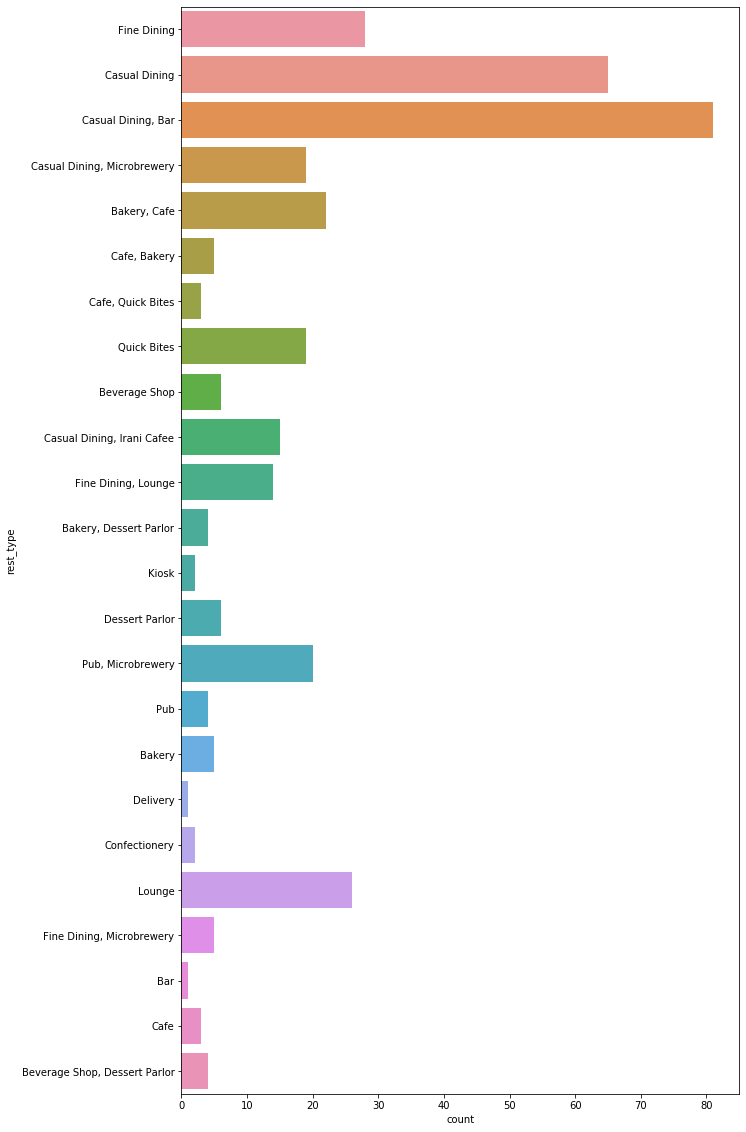

In [591]:
#characteristics of Lavelle Road neighbourhood
#Below grpah shows the type of restaurants in Lavelle Road, it shows that Casual Dining and Bar are
#the most in the Lavelle Road neighbourhood
fig = plt.figure(figsize=(10,20))
sns.countplot(y=top_location['rest_type'])

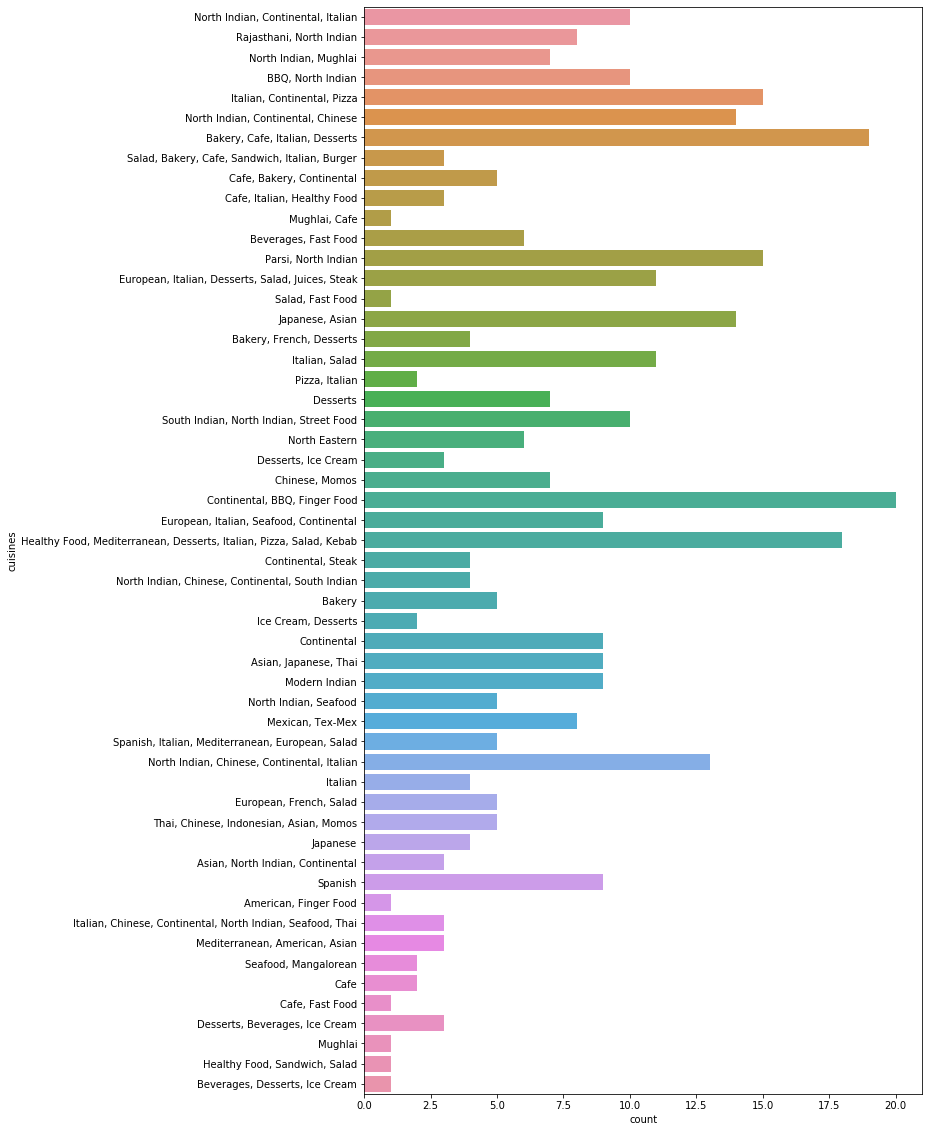

In [592]:
#Below graph shows types of cusines they offer in the lavele road, it depicts finger food, BBQ and Continental 
# are most offered cusines in lavelle road neighbour hood
fig = plt.figure(figsize=(10,20))
sns.countplot(y=top_location['cuisines'])

In [593]:
#Below result shows the top rated Restaurant in the Lavelle Road
top_restaurants = top_location.sort_values(by=['rating'],ascending=False)
top_restaurants.iloc[0]

url                https://www.zomato.com/SmokeHouseDeli-LavelleR...
address                52/ 53, Ground Floor, Lavelle Road, Bangalore
name                                                Smoke House Deli
online_order                                                     Yes
book_table                                                        No
rating                                                           4.6
votes                                                           2492
phone                           +91 8041277989\r\r\r\n+91 8041276272
location                                                Lavelle Road
rest_type                                              Casual Dining
dish_liked         Burgers, Cocktails, Salads, Veg Burger, Peri C...
cuisines           European, Italian, Desserts, Salad, Juices, Steak
approx_cost                                                     1600
reviews_list       [('Rated 5.0', 'RATED\n  Food is always excell...
menu_item                         

##### 3.Build the best model you can that forecasts the approximate cost of a meal for two people using the attributes location, rating, restaurant type, and cuisine.

#### a. Explain what is the task you’re solving (e.g., supervised x unsupervised, classification x regression x clustering or similarity matching x etc)

##### supervised x unsupervised
In supervised learning, we train the model with labelled data or the data which is tagged with the correct solution. Then we provide the model with new samples of training data to predict the label using the already provided labelled data while training. On contrast, in unsupervised learning, model will not be provided any guidance or correctly labelled data as a feed. But it should group unsorted data based on their similarities, patterns or differences.
Unsupervised learning is classified into two categories such as clustering and association, while the supervised is classified into categories such as classification and regression.

  In our assignment we are training the model with labelled target data such as approximate cost and attributes such as location, rating, cuisine and restaurant type. Then model task is to forecast the approximate cost of a meal for the new data feed with same attributes of location, rating, cuisine and restaurant type. So, based on above analysis, our task falls under supervised learning[1][2].

##### classification x regression x clustering x similarity matching
As our task in this assignment falls under supervised learning, we should decide either to use classification or regression and can drop the idea of clustering or similarity matching. Classification is the task of approximating a discrete class label output while the regression is a problem of predicting a continuous quantity output. In Classification input variables are of type discrete or real-valued which is same as regression, but output variable in regression is always a real value indicating either integer or float point. 

  So, the output of regression is always an amount or size prediction while the output variable of classification is predicting a discrete variable such as category or class. Our objective of this assignment is to predict the approximate cost of a meal for two people, which is a __real value as output variable__[3][4]. So, we can determine that our task falls under regression based on the above explanation

##### b. What models will you choose? Why?
Regression model mathematically describes the relationship between input set of independent variables and a dependent output variable. We have different regression models that measure continuous, categorical or count dependent variable. Linear regression: To measure continuous dependent variable, our immediate goal is to use linear regression and check whether it fits our model by evaluating with the help of metrics. Non-linear regression: It is same as linear regression to measure continuous dependent variable but follows different algorithms, which can fit numerous varieties of curves and evaluate with the help of suitable metrics. Logistic regression: To measure categorical dependent variable as output. It uses maximum likelihood estimation in contrast to least squares calculation used in linear regression. Poisson regression: To measure count variable either an occurrence or any other consistent observation.[5]
 So, based on the analysis we found that our target variable to estimate the cost of a meal is __continuous dependent variable, which requires to use linear regression and non-linear regression models__ and then check which is suitable based on the metrics. As part of non -linear regression we used __decision tree and random forest algorithms__ to compare the models.

##### c. Which metrics will you use to evaluate your model?

#### RMSE: [6][7]
Root Mean Squared Error is popular metric to show large number of deviations from the predicted response. As it is squared value, it provides absolute value cancelling positive and negative errors, which is useful and easy to perform calculations on information. Lower values of RMSE indicate better fit. 
#### MSE: 
Mean Squared Error is same as RMSE, but here negative values will not be cancelled by positive values. Units are same as RMSE and like RMSE, lower the values, better the model fits to data.
#### R-Squared: 
R squared though not a good measure for non-linear regression models, it is a good metric for linear regression models. It ranges between 0 - 1, and generally higher the value, better the model fits the data. 
#### Training and Testing Score: 
Training score is calculated by finding the accuracy of the model over training data set while testing score is the accuracy of the model over test data set. If the scores of training and testing are relatively similar, then the model is not overfit or underfit

#### d. How do you make sure not to overfit?

Initially to detect either our model is underfit or overfit we need to find the accuracy of the model over train data set and test data set. If there is a huge difference in the accuracy and our model has high accuracy with train data set, then we can conclude that our model is overfit. Measures to avoid or prevent overfitting: Cross validation: It prevents overfitting to some extent as in this process we split training data into multiple test-train data sets and then iteratively estimate the model performance on unseen test data. Sampling with more data: Training with more data helps the model to easily predict the label for test data which in turn builds the model not to underfit or overfit. Removal of unwanted features: Feature selection and removing noise generalize the model correctly to predict the test data which helps the model not to underfit or overfit. __Depth of a tree or the number of iterations:__ To stop the process once satisfied with the accuracy and having less depth or the number of iterations prevents overfitting the model.[8]

In [399]:
# from cleaned data we are selecting the attributes required for the prediction and building the model
fcd = cd[['location','rating','rest_type','cuisines','approx_cost']]

In [401]:
# Features that are used for the prediction are seperated into a dataframe
X = fcd[['location','rating','rest_type','cuisines']]

In [402]:
# Target values are seperated into another model
Y = fcd[['approx_cost']]

##### e. Build your model and verify how it performs (using the metrics you have chosen in Section 3(c)) in your training data.

In [568]:
#Regression Models which we are considering to implement works on numerical data, so we used one hot endcoing 
#ref: https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f
X = pd.get_dummies(data=X, drop_first=True)

In [406]:
#Spliting the data set into Train and Test dataset and using the random state as 24 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=24)

In [426]:
#Linear Regression
#Ref: Lab3, Special Topics in Data Sceince
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix  
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn import metrics
from math import sqrt
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_li = lr.predict(X_test)
y_pred_train_li = lr.predict(X_train)

print("R2   :", r2_score(y_test, y_pred_li))
print("Mean Squared Error :", mean_squared_error(y_test,y_pred_li))
print("RMSE :", sqrt(mean_squared_error(y_test,y_pred_li)))
print("Mean Absolute Error :", mean_absolute_error(y_test, y_pred_li))
print("Training Accuracy :", lr.score(X_train, y_train))


R2   : -3.9928733445859416e+20
Mean Squared Error : 9.373524187853344e+25
RMSE : 9681696229408.018
Mean Absolute Error : 463784089612.23706
Training Accuracy : 0.8980053877351175


From the above analysis, the metrics like R2 score is negative, but R2 score should be idealy near to 1 for a good model, Mean Squared Error is very high which should be minimal, Similarly RMSE also should be in the predicted range which is more, So we started exploring Non-Linear models such as Decision Tree and Random Forest Regression.

In [430]:
#Decision Tree Regressor
#Ref: https://scikit-learn.org/stable/modules/tree.html
from sklearn.tree import DecisionTreeRegressor  
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix  
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn import metrics
from math import sqrt
# create a regressor object 
dtr = DecisionTreeRegressor(random_state = 0)  
  
# fit the regressor with X and Y data 
dtr.fit(X_train, y_train)

y_pred_dtr = dtr.predict(X_test)
y_pred_train_dtr = dtr.predict(X_train)

print("R2   :", r2_score(y_test, y_pred_dtr))
print("Mean Squared Error :", mean_squared_error(y_test,y_pred_dtr))
print("RMSE :", sqrt(mean_squared_error(y_test,y_pred_dtr)))
print("Mean Absolute Error :", mean_absolute_error(y_test, y_pred_dtr))
print("Training Accuracy :", dtr.score(X_train, y_train))

R2   : 0.9291999599634879
Mean Squared Error : 16620.759801537137
RMSE : 128.92152574933766
Mean Absolute Error : 47.06512226996205
Training Accuracy : 0.9964143283084405


Based on the above results, We can clearly see the model is performing much better than the linear regression model. The metircs like R2 is near 1, which generally depicts good model, Similarly all other metircs like RMSE,Mean Absoulte Error shows that model is good as they are less.  

In [437]:
#Random Forest Regressor
#ref: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix  
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn import metrics
from math import sqrt

rf = RandomForestRegressor(n_estimators = 10, random_state = 24)
rf.fit(X_train, y_train);

y_pred_rfr = rf.predict(X_test)
y_pred_train_rfr = rf.predict(X_train)

print("R2   :", r2_score(y_test, y_pred_rfr))
print("Mean Squared Error :", mean_squared_error(y_test,y_pred_rfr))
print("RMSE :", sqrt(mean_squared_error(y_test,y_pred_rfr)))
print("Mean Absolute Error :", mean_absolute_error(y_test, y_pred_rfr))
print("Training Accuracy :", rf.score(X_train, y_train))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


R2   : 0.923005062483316
Mean Squared Error : 18075.05139459252
RMSE : 134.44348773589786
Mean Absolute Error : 58.67701126014741
Training Accuracy : 0.986034411264664


Similar to Decision tree the results for Random Forest is better, which can be shown using the metrics like R2 near to 1, Mean Squared Error and Mean absoulte Error are lesser than Decision Tree. Training score is also shows better performance of the model. Random Forest Regressor performs better, as it iterates multiple decision tree regressors  and compares the accuracies to fit the model, which leads to better performance and a good fit.

In [440]:
#XG Boost
#Ref: https://www.kaggle.com/kenji19840210/basic-prediction-with-xgboost-xgbregressor
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix  
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn import metrics
from math import sqrt


data_matox = xgb.DMatrix(data=X_train,label=y_train)
xg_reg = xgb.XGBRegressor()
xg_reg.fit(X_train,y_train)

y_pred_xg = xg_reg.predict(X_test)
y_pred_train_xg = xg_reg.predict(X_train)

print("R2   :", r2_score(y_test, y_pred_xg))
print("Mean Squared Error :", mean_squared_error(y_test,y_pred_xg))
print("RMSE :", sqrt(mean_squared_error(y_test,y_pred_xg)))
print("Mean Absolute Error :", mean_absolute_error(y_test, y_pred_xg))
print("Training Accuracy :", xg_reg.score(X_train, y_train))

[17:03:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R2   : 0.7467116298731387
Mean Squared Error : 59461.05621169632
RMSE : 243.84637830342348
Mean Absolute Error : 167.0275281689137
Training Accuracy : 0.7444394192273497


XGBoost is used to tune the logistic regression, but the results are less when compared to Random Forest, which is depicted by different metircs like R2, Mean Squared Error, Mean Squared Error, RMSE and Traning score 

In [445]:
# Cross Validation for different model to find out if data is overfitting or not
#Lab3, Special Topics in Data Science
from sklearn.model_selection import cross_val_score
LinearRegScores = cross_val_score(lr, X_train, y_train, cv=5)
DecisionTreeScores = cross_val_score(dtr, X_train, y_train, cv=5)
RandomForestScores = cross_val_score(rf, X_train, y_train, cv=5)
XGBoostScores = cross_val_score(xg_reg, X_train, y_train, cv=5)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_c

[17:21:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:24:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:26:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:28:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:31:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


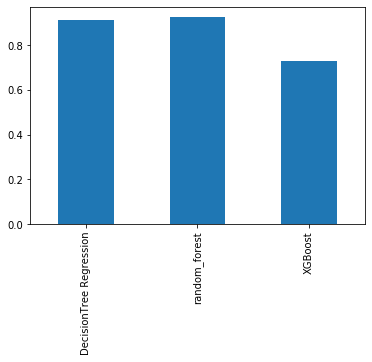

In [594]:
import pandas as pd
cross_validation_scores = pd.DataFrame(DecisionTreeScores,columns=['DecisionTree Regression'])
cross_validation_scores = cross_validation_scores.assign(random_forest=RandomForestScores)
cross_validation_scores = cross_validation_scores.assign(XGBoost=XGBoostScores)
cross_validation_scores.mean().plot(kind='bar')

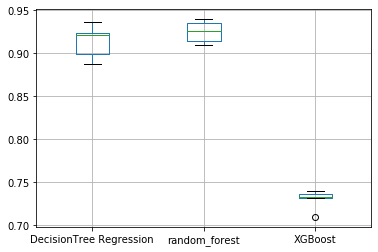

In [595]:
cross_validation_scores.boxplot()

In [596]:
#Random Forest Cross Validation Scores 
RandomForestScores

array([0.90972   , 0.91433531, 0.93510681, 0.92553753, 0.93949335])

We have chosen cross Validation as it takes folds of data and the results of it depicts the fit and stability of the model and also shows if model is overfitted or not. 
    The above graphs shows that random forest has better performance than other models and also Cross validation scores shows that model is performing consistantly, which. depicts that model is a good fit for different folds of data.

#### f.Test your model in your testing set and evaluate its performance. Use a plot to justify your findings. How is it performing compared to your training data?

As shown above we have tested with Test data and predicted the values for each model and stored y_pred_XXX for all the models and used the vaules using metrics Like R2_score, RMSE, MeanSquaredError, Absoulte Mean Square Error to estimate their performance. 

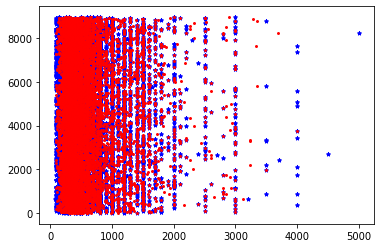

In [566]:
# below is the scatter plot for the predicted values and test values of the target variable i.e, approx_cost 
# for better performing model i.e., random forest regressor for the given dataset
count = y_test.shape[0]
count = range(count)
plt.figure()
plt.scatter(y_test,count, color='b',s=15,marker='*')
plt.scatter(y_pred_rfr, count,  color='r',s=15,marker='.')

We have ploted the above graph for the predicted values and the test target values for Random Forest Regressor, which shows that most of the values overlap and they are few outliers (Blue dots), which shows that model doesnot over fit and also rest are coinciding with the predicted values showing that the model is good and performing better.

#### g. Can you tune your model to perform better? Explain the technique you’re using and justify why it is improving your results.

In [444]:
#(Tuning Method 1:) Ada Boost with Random Forest Regressor by feeding already built Random Forest Regressor (rf)
#ref: https://www.kaggle.com/ccourtot/sklearn-adaboostclassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix  
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn import metrics
from math import sqrt


abreg_rf = AdaBoostRegressor(rf, n_estimators=5)
abreg_rf.fit(X_train, y_train)
y_pred_abreg_rf = abreg_rf.predict(X_test)
y_pred_abreg_train_rf = abreg_rf.predict(X_train)

print("R2   :", r2_score(y_test, y_pred_abreg_rf))
print("Mean Squared Error :", mean_squared_error(y_test,y_pred_abreg_rf))
print("RMSE :", sqrt(mean_squared_error(y_test,y_pred_abreg_rf)))
print("Mean Absolute Error :", mean_absolute_error(y_test, y_pred_abreg_rf))
print("Training Accuracy :", abreg_rf.score(X_train, y_train))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


R2   : 0.9325919583931916
Mean Squared Error : 15824.4665915584
RMSE : 125.79533612800753
Mean Absolute Error : 55.60170383626733
Training Accuracy : 0.990841953878053


In the above we have tunned already built Random Forest Regressor model using ADABoost, It builds a strong model using multiple number of weak learners. The metrics for the tuned random forest regressor moving towards 1 and other errors like Mean Squared Error, RMSE, Mean Absolute Error, become less when compared to the original Random Forest Model. The Training accuracy also increased which shows that model is fitted better.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

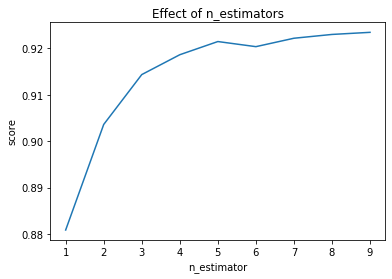

In [464]:
#(Tuning Method 2:) Comparing the accracy of Multiple estimators for the already built Random forest regressor
# Ref: https://www.kaggle.com/nsrose7224/random-forest-regressor-accuracy-0-91
estimators = np.arange(1, 10)
scores = []
for i in estimators:
    rf.set_params(n_estimators=i)
    rf.fit(X_train, y_train)
    scores.append(rf.score(X_test, y_test))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

The above graph is between Score and estimators for already built random forest regressor(rf), We have increased the estimator value from 0 to 10 and calculated the scores for each round, These values are used to plot the graph, as it shows that the performance increase as the estimtors increase and sometimes it slightly falls but the overall accuracy is increasing as number of estimators increase. In this way the accuracy of the random forest regressor is tuned.

In [569]:
#(Tuning Method 3:)  Using Gird Search
# Ref: Special Topics Lab3 tutorial
from sklearn.model_selection import GridSearchCV
parameters = {'max_features':['auto','sqrt','log2'],'n_estimators':[1,2,3,4,5,6,7,8,9,10]}
clf = GridSearchCV(rf, parameters, cv=5)
clf.fit(X, Y)
clf.best_score_,clf.best_estimator_,clf.best_params_

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Pytho

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Pytho

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Pytho

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Pytho

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Pytho

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Pytho

(0.9339580884376447,
 RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                       max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=24, verbose=0,
                       warm_start=False),
 {'max_features': 'sqrt', 'n_estimators': 10})

We used another tunning method Grid Search, as suggested in Lab3, It configures optimal parameters for the given model. The Results shows that their is a slight increase score of already built Random Forest Regressor model. Thus, the performance of the model is improved.

##### h.(Bonus) Use relief feature selection to improve your model.(10 marks)

In [539]:
#Relief Feature Selection
#Creating new subset for selection of. relief features
RfeatX = cd[['location','rating','rest_type','cuisines']]
RfeatY = cd['approx_cost']

In [541]:
#perofrming Label encoding for Selecting features, as relief features function expects Numerical values 
#and doesnt operate on boolean values
from sklearn.preprocessing import LabelEncoder
number=LabelEncoder()
RfeatX['location']=number.fit_transform(RfeatX['location'].astype('str'))
RfeatX['rest_type']=number.fit_transform(RfeatX['rest_type'].astype('str'))
RfeatX['cuisines']=number.fit_transform(RfeatX['cuisines'].astype('str'))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

In [542]:
#Below are the weights of the Relief Features 
#ref :  https://gitlab.com/qafir/sklearn-relief
import sklearn_relief as relief
RFFeature = relief.Relief(n_features=3)
RFFeature.fit_transform(RfeatX.values,RfeatY.values)
print(RFFeature.w_)

[2.01  0.648 0.37  1.9  ]


The above Weights shows that the columns location, rating, cuissines are best features for predicting the target variables.

References:
1.https://www.kaggle.com/agnihotri/zomato-data-exploration-and-visualization/notebook#Loading-and-Understanding-Data
2.https://www.geeksforgeeks.org/supervised-unsupervised-learning/
3.https://machinelearningmastery.com/classification-versus-regression-in-machine-learning/
4.https://statisticsbyjim.com/regression/choosing-regression-analysis/
5.https://statisticsbyjim.com/regression/difference-between-linear-nonlinear-regression-models/	
6.https://www.analyticsvidhya.com/blog/2016/02/7-important-model-evaluation-error-metrics/
7.https://www.vernier.com/til/1014/
8.https://elitedatascience.com/overfitting-in-machine-learning
9.https://www.theanalysisfactor.com/assessing-the-fit-of-regression-models/